(3124, 28)
Binarized data:

 [[1 1 1 ... 1 1 0]
 [1 1 0 ... 1 0 0]
 [1 1 0 ... 1 0 0]
 ...
 [1 1 0 ... 1 1 0]
 [1 1 0 ... 1 1 0]
 [1 1 0 ... 1 1 0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Original accuracy  without automatic feature selection on train data 0.5678271308523409
Original accuracy without automatic feature selection on test data 0.5648
(2499, 28)
(2499, 14)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 2  7 22 27] are constant.
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accurracy when selectpercentile automatic feature selection is used on test data 0.5584


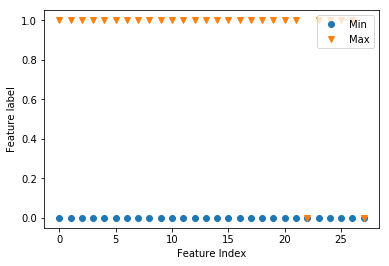

In [286]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, neighbors,model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.feature_selection import SelectPercentile
import matplotlib.pyplot as plt

%matplotlib inline


#THIS TRAINS BASED ON THIS JOB DATASET, TO HELP PREDICT THE LEVEL A WORKER IS BASED ON ALL OTHER FEATURES


#Load in dataset
df=pd.read_csv('nyc-jobs.csv', names=['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Code No', 'Level', 'Job Category',
       'Full-Time/Part-Time indicator', 'Salary Range From', 'Salary Range To',
       'Salary Frequency','Work Location', 'Division/Work Unit',
       'Job Description', 'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date'])

#print dataset shape
print(df.shape)



#PREPROCESSING THE DATASET



#Encode all your features columns before converting to array
for column in df.columns:
    if df[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
        

#Convert the X Features to array
X=np.array(df)

#apply binary preprocessing to convert X to ones and zeros
bindata = preprocessing.Binarizer(threshold=1.5).transform(X)
print('Binarized data:\n\n', bindata)


#Convert the y labels to array
y=np.array(df['Level'])



#TRAINING OR FITTING



#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(bindata, y, test_size=0.2) 

#CHOOSE A CLASIFIER ALGORITHM

clasifier =LogisticRegression(C=1000)

#use algorithm to train
clasifier.fit(X_train,y_train)

#test algorithm on test and train data
accuracy = clasifier.score(X_train, y_train)
print("Original accuracy  without automatic feature selection on train data",accuracy )

accuracy = clasifier.score(X_test, y_test)
print("Original accuracy without automatic feature selection on test data",accuracy )







#VISUALISE X AND Y DATA


plt.plot(X_train.min(axis=0), 'o', label='Min')
plt.plot(X_train.max(axis=0), 'v', label='Max')
plt.xlabel('Feature Index')
plt.ylabel('Feature label')

plt.legend(loc='upper right')









#CHOOSE AN AUTOMATIC FEATURE SELECTION



#I CHOOSE SELECTPERCENTILE

#applying the select percentile to transform x_train and printing the shape versus the original one

Featureselection= SelectPercentile(percentile=50)   


Featureselection.fit(X_train,y_train)
xtrainselected=Featureselection.transform(X_train)
xtest=Featureselection.transform(X_test)

#print to see if the selectpercentile worked
print (X_train.shape)

print (xtrainselected.shape)


#to train on the select percentile  data

clasifier.fit(xtrainselected,y_train)


accuracy = clasifier.score(xtest, y_test)

print ("Accurracy when selectpercentile automatic feature selection is used on test data" ,accuracy)

